# Credit Card Fraud Classification

### This is a continuation on the analysis of fraudluent credit transactions and utilization, now transitioning to an emphasis on classifcation and predictive modeling to assist in the prevention and anticipation of future fraudulent credit card transactions

### Project 2 - ITSC 3162

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

## Data Pre-Processing

### Below is the primary dataset for Fraudulent Transactions

In [23]:
cc_ibm_data = pd.read_csv('/Users/joshuahernandez8/Desktop/ITCS 3162/Project 2 - Credit Card Fraud Classification/credit_data/credit_card_transactions-ibm_v2.csv')

### Renaming 'Is Fraud?' variable to 'Fraud' to call more easily

In [27]:
cc_ibm_data.rename(columns = {'Is Fraud?':'Fraud'}, inplace = True)

In [28]:
cc_ibm_data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Fraud
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [5]:

cc_ibm_data.describe()

,User,Card,Year,Month,Day,Merchant Name,Zip,MCC
count,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.150876e+07,2.438690e+07
mean,1.001019e+03,1.351366e+00,2.011955e+03,6.525064e+00,1.571812e+01,-4.769230e+17,5.095644e+04,5.561171e+03
std,5.694612e+02,1.407154e+00,5.105921e+00,3.472355e+00,8.794073e+00,4.758940e+18,2.939707e+04,8.793154e+02
min,0.000000e+00,0.000000e+00,1.991000e+03,1.000000e+00,1.000000e+00,-9.222899e+18,5.010000e+02,1.711000e+03
25%,5.100000e+02,0.000000e+00,2.008000e+03,3.000000e+00,8.000000e+00,-4.500543e+18,2.837400e+04,5.300000e+03
50%,1.006000e+03,1.000000e+00,2.013000e+03,7.000000e+00,1.600000e+01,-7.946765e+17,4.674200e+04,5.499000e+03
75%,1.477000e+03,2.000000e+00,2.016000e+03,1.000000e+01,2.300000e+01,3.189517e+18,7.756400e+04,5.812000e+03
max,1.999000e+03,8.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,9.223292e+18,9.992800e+04,9.402000e+03


In [29]:
cc_ibm_data.shape

(24386900, 15)

### Below are additional datasets with disticnt details on the cards themselves, and cardholder demographics
### (may or may not be used in modeling)

In [30]:
sd_card_data = pd.read_csv("/Users/joshuahernandez8/Desktop/ITCS 3162/Project 2 - Credit Card Fraud Classification/credit_data/sd254_cards.csv")
sd_user_data = pd.read_csv('/Users/joshuahernandez8/Desktop/ITCS 3162/Project 2 - Credit Card Fraud Classification/credit_data/sd254_users.csv')
user0_cc_data = pd.read_csv('/Users/joshuahernandez8/Desktop/ITCS 3162/Project 2 - Credit Card Fraud Classification/credit_data/User0_credit_card_transactions.csv')

In [6]:
## This dataset provides distinct information on the cards themselves 
sd_card_data.head()


,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [32]:
sd_user_data.shape

(2000, 18)

In [33]:
sd_user_data.isnull()

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


## Based on the analysis and association of the User and Card Datasets, People are charactertized as 'Users' with a total population of 2000 (0-1999)

### By creating this a column 'Users' in the User dataset, we can join IBM fraud Data and User dataset tables on the common field 'User'

### User and IBM Fraud dataset can be joined with one another to make a more balanced and descriptive dataset

In [34]:
#creating 'User' field
user = []

for i in range (2000):
    user.append(i)
    


sd_user_data['User'] = user 

In [35]:
sd_user_data.head()

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,User
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,0
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5,1
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5,2
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4,3
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1,4


In [36]:

left_df = cc_ibm_data
right_df = sd_user_data

ibm_user_df = left_df.merge(right_df, on = 'User', how = 'left')

ibm_user_df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,...,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,...,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5


In [37]:
ibm_user_df.isna().sum()

User                                  0
Card                                  0
Year                                  0
Month                                 0
Day                                   0
Time                                  0
Amount                                0
Use Chip                              0
Merchant Name                         0
Merchant City                         0
Merchant State                  2720821
Zip                             2878135
MCC                                   0
Errors?                        23998469
Fraud                                 0
Person                                0
Current Age                           0
Retirement Age                        0
Birth Year                            0
Birth Month                           0
Gender                                0
Address                               0
Apartment                      17762699
City                                  0
State                                 0


In [ ]:
ibm_user_df.isnull()

### Renaming 'Yearly Income - Person' variable to 'Yearly_Income_User' to call more easily

In [38]:
ibm_user_df.rename(columns = {'Yearly Income - Person':'Yearly_Income_User'}, inplace = True)

### Label Encoding
They are all categorical so how can we transform them into numerical?
Scikit Learn has method to help with this.

In [39]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for col in ibm_user_df.columns:
    ibm_user_df[col] = enc.fit(ibm_user_df[col]).transform(ibm_user_df[col])

In [ ]:
ibm_user_df.dtypes

## Data Visualization

In [14]:
ibm_user_df['Is Fraud?'].value_counts()

No     24357143
Yes       29757
Name: Is Fraud?, dtype: int64

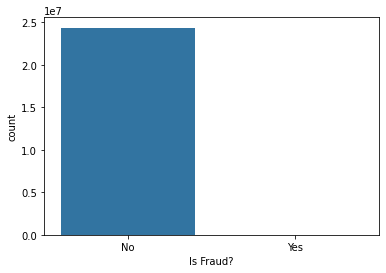

In [15]:
ax = sns.countplot( x= 'Is Fraud?', data = ibm_user_df)

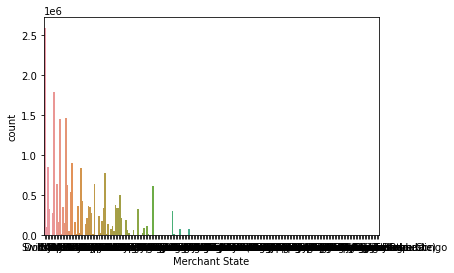

In [16]:
ax = sns.countplot( x= 'Merchant State', data = ibm_user_df)

## How can we make the X -axis variables more clear??

## Change state attribute to postal codes

## Set rotate parameter in seaborn 

## Change font size in seaborn 

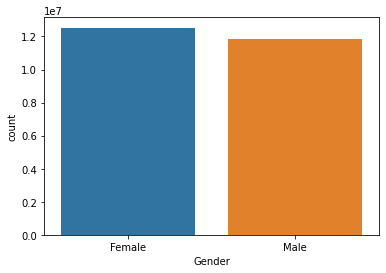

In [17]:
ax = sns.countplot( x= 'Gender', data = ibm_user_df)

### Renaming 'Total Debt' variable to 'Total_Debt_User' to call more easily 

In [ ]:
#ibm_user_df.rename(columns = {'Total Debt':'Total_Debt_User'}, inplace = True)

## ^^^ Do you need this??? Try without running this and see if it works


### Looking to compare variables and their propensity with frauduent vs. non-fraudulent transactions

### FICO Score

<AxesSubplot:xlabel='FICO Score', ylabel='Fraud'>

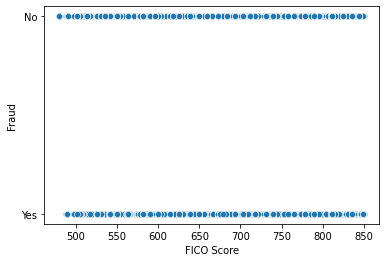

In [19]:
sns.scatterplot(data=ibm_user_df, x="FICO Score", y="Fraud")

### Year Transaction Occured

In [ ]:
sns.scatterplot(data=ibm_user_df, x="Year", y="Fraud", hue = "Fraud")

### Label Encoding
They are all categorical so how can we transform them into numerical?
Scikit Learn has method to help with this.

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for col in ibm_user_df.columns:
    ibm_user_df[col] = enc.fit(ibm_user_df[col]).transform(ibm_user_df[col])

In [40]:
ibm_user_df.dtypes

User                           int64
Card                           int64
Year                           int64
Month                          int64
Day                            int64
Time                           int64
Amount                         int64
Use Chip                       int64
Merchant Name                  int64
Merchant City                  int64
Merchant State                 int64
Zip                            int64
MCC                            int64
Errors?                        int64
Fraud                          int64
Person                         int64
Current Age                    int64
Retirement Age                 int64
Birth Year                     int64
Birth Month                    int64
Gender                         int64
Address                        int64
Apartment                      int64
City                           int64
State                          int64
Zipcode                        int64
Latitude                       int64
L

In [59]:
ibm_user_df.head()
ibm_user_df.shape

(24386900, 33)

## Decision Tree

In [41]:
x = ibm_user_df.drop(['Fraud'], axis = 1) # we will use all columns except 'class'
y = ibm_user_df['Fraud'] # this is our target value

In [43]:
x.shape, y.shape

((24386900, 32), (24386900,))

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.80)

In [46]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((4877380, 32), (19509520, 32), (4877380,), (19509520,))

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model = DecisionTreeClassifier() # initialize our model

In [49]:
model.fit(x, y) ## This lines actually TRAINS our model

DecisionTreeClassifier()

## Evaluating our Model!

In [51]:
from sklearn.metrics import accuracy_score

In [54]:
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [55]:
y_predictions = model.predict(xtest)
accuracy_score(y_predictions, ytest)

0.9993138221750202

### Raw view of the Decision Tree Model

[Text(173.72906544780383, 215.34923076923076, 'X[11] <= 27320.5\ngini = 0.002\nsamples = 4877380\nvalue = [4871350, 6030]'),
 Text(95.45094800697636, 211.1676923076923, 'X[2] <= 18.5\ngini = 0.0\nsamples = 4301506\nvalue = [4300530, 976]'),
 Text(33.78083811699404, 206.98615384615385, 'X[13] <= 16.5\ngini = 0.001\nsamples = 1347887\nvalue = [1347277, 610]'),
 Text(4.933723118399044, 202.80461538461537, 'X[12] <= 95.5\ngini = 0.014\nsamples = 3673\nvalue = [3647, 26]'),
 Text(2.995829034874121, 198.62307692307692, 'X[12] <= 25.5\ngini = 0.012\nsamples = 3578\nvalue = [3557, 21]'),
 Text(1.5685213178304709, 194.44153846153847, 'X[24] <= 1784.5\ngini = 0.145\nsamples = 38\nvalue = [35, 3]'),
 Text(1.449014931710054, 190.26, 'X[9] <= 2941.5\ngini = 0.102\nsamples = 37\nvalue = [35, 2]'),
 Text(1.3295085455896372, 186.07846153846154, 'X[24] <= 833.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(1.2100021594692203, 181.8969230769231, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(1.

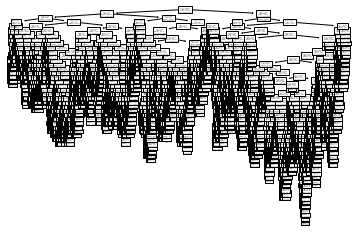

In [56]:
from sklearn import tree
tree.plot_tree(model)